Bellabeat is a high-tech manufacturer of health-focused products for women.

How are consumers using their smart devices, and how should this guide Bellabeat's marketing strategy?

The dataset provided is a Fitbit dataset generated via an Amazon Mechanical Turk survey between March 12, 2016 and May 12, 2016. The actual given data is from April 12, 2016 to May 9, 2016.

Some caveats of the dataset provided are that the participants' demographics are not recorded, so we cannot know if they are all women, the target consumer group, or whether they are representative of all ethnicities. Furthermore, the sample group is small and the survey time is short, so the data may not be indicative of year-round habits, and it was collected six years ago, so it may not reflect current consumers' usage habits.

First, let's decide what data we will need. The daily and hourly datasets should be enough to get a feel for the consumers' usage habits.

In [71]:
import pandas as pd
import seaborn as sns

activity = pd.read_csv('Fitabase Data 4.12.16-5.12.16\dailyActivity_merged.csv')
sleep = pd.read_csv('Fitabase Data 4.12.16-5.12.16\sleepDay_merged.csv')
steps = pd.read_csv('Fitabase Data 4.12.16-5.12.16\hourlySteps_merged.csv')
intensities = pd.read_csv('Fitabase Data 4.12.16-5.12.16\hourlyIntensities_merged.csv')

Now that the desired datasets are inported and converted to pandas dataframes, let's take a look at the information they contain.

In [72]:
activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

It appears that the ActivityDate column is not in the correct format. Further investigation reveals that all the datasets suffer from the same problem, so let's convert their dates into the correct datetime format.

In [73]:
activity['ActivityDate'] = pd.to_datetime(activity['ActivityDate'])
activity['ActivityDate'].head()

0   2016-04-12
1   2016-04-13
2   2016-04-14
3   2016-04-15
4   2016-04-16
Name: ActivityDate, dtype: datetime64[ns]

In [74]:
steps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            22099 non-null  int64 
 1   ActivityHour  22099 non-null  object
 2   StepTotal     22099 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 518.1+ KB


In [75]:
steps['ActivityHour'] = pd.to_datetime(steps['ActivityHour'], format = '%m/%d/%Y %I:%M:%S %p')
steps['ActivityHour'].tail()

22094   2016-05-12 10:00:00
22095   2016-05-12 11:00:00
22096   2016-05-12 12:00:00
22097   2016-05-12 13:00:00
22098   2016-05-12 14:00:00
Name: ActivityHour, dtype: datetime64[ns]

In [76]:
intensities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Id                22099 non-null  int64  
 1   ActivityHour      22099 non-null  object 
 2   TotalIntensity    22099 non-null  int64  
 3   AverageIntensity  22099 non-null  float64
dtypes: float64(1), int64(2), object(1)
memory usage: 690.7+ KB


In [77]:
intensities['ActivityHour'] = pd.to_datetime(intensities['ActivityHour'], format = '%m/%d/%Y %I:%M:%S %p')
intensities['ActivityHour'].tail()

22094   2016-05-12 10:00:00
22095   2016-05-12 11:00:00
22096   2016-05-12 12:00:00
22097   2016-05-12 13:00:00
22098   2016-05-12 14:00:00
Name: ActivityHour, dtype: datetime64[ns]

In [78]:
sleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Id                  413 non-null    int64 
 1   SleepDay            413 non-null    object
 2   TotalSleepRecords   413 non-null    int64 
 3   TotalMinutesAsleep  413 non-null    int64 
 4   TotalTimeInBed      413 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 16.3+ KB


This dataset gives the time as well as the date. However, it appears all the times recorded are 12:00:00 AM, so they are most likely filler values and can be ignored.

In [79]:
sleep['SleepDay'] = pd.to_datetime(sleep['SleepDay'])
sleep['SleepDay'].head()

0   2016-04-12
1   2016-04-13
2   2016-04-15
3   2016-04-16
4   2016-04-17
Name: SleepDay, dtype: datetime64[ns]

Next, let's check the IDs of the participants. It appears all 33 unique IDs (participants) are the same in the activity, calories, and intensities datasets, but the sleep dataset only has 24 of these.

In [80]:
activity['Id'].nunique()

33

In [81]:
intensities['Id'].nunique()

33

In [82]:
steps['Id'].nunique()

33

In [83]:
sleep['Id'].nunique()

24

In [84]:
activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   Id                        940 non-null    int64         
 1   ActivityDate              940 non-null    datetime64[ns]
 2   TotalSteps                940 non-null    int64         
 3   TotalDistance             940 non-null    float64       
 4   TrackerDistance           940 non-null    float64       
 5   LoggedActivitiesDistance  940 non-null    float64       
 6   VeryActiveDistance        940 non-null    float64       
 7   ModeratelyActiveDistance  940 non-null    float64       
 8   LightActiveDistance       940 non-null    float64       
 9   SedentaryActiveDistance   940 non-null    float64       
 10  VeryActiveMinutes         940 non-null    int64         
 11  FairlyActiveMinutes       940 non-null    int64         
 12  LightlyActiveMinutes  

In [85]:
steps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Id            22099 non-null  int64         
 1   ActivityHour  22099 non-null  datetime64[ns]
 2   StepTotal     22099 non-null  int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 518.1 KB


In [86]:
intensities.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Id                22099 non-null  int64         
 1   ActivityHour      22099 non-null  datetime64[ns]
 2   TotalIntensity    22099 non-null  int64         
 3   AverageIntensity  22099 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(2)
memory usage: 690.7 KB


In [87]:
sleep.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Id                  413 non-null    int64         
 1   SleepDay            413 non-null    datetime64[ns]
 2   TotalSleepRecords   413 non-null    int64         
 3   TotalMinutesAsleep  413 non-null    int64         
 4   TotalTimeInBed      413 non-null    int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 16.3 KB


In [ ]:
# Find how many users are sedentary/lightly active/sufficiently active

[Text(0.5, 1.0, 'Daily Calories vs Steps Taken'),
 Text(0.5, 0, 'Steps'),
 Text(0, 0.5, 'Calories')]

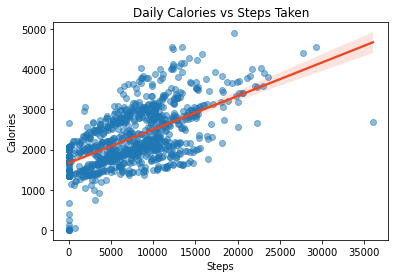

In [88]:
# Let's graph (activites) calories vs total steps (scatter plot)
sns.regplot(x = activity['TotalSteps'], y = activity['Calories'], scatter_kws = {'alpha' : 0.5}, line_kws = {'color' : '#EE4520'}).set(title = "Daily Calories vs Steps Taken", xlabel = "Steps", ylabel = "Calories")